# **Principle Component Analysis**
## **TOP ANIME 2023**



   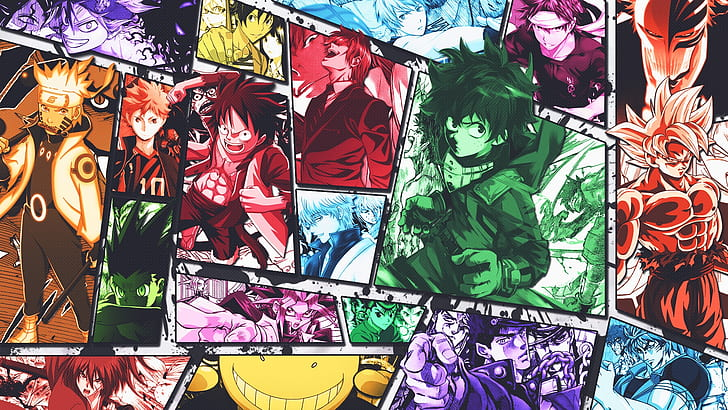! ![](https://c4.wallpaperflare.com/wallpaper/831/162/428/son-goku-monkey-d-luffy-uzumaki-naruto-gon-css-wallpaper-preview.jpg)   

## PCA HOẠT ĐỘNG NHƯ THẾ NÀO ?

PCA tìm các thành phần chính của dữ liệu

Việc đo lường dữ liệu theo các thành phần chính của nó thường hữu ích hơn là theo trục x-y thông thường. Vì vậy, các thành phần chính sau đó là gì? Chúng là cấu trúc cơ bản trong dữ liệu. Chúng là những hướng có nhiều phương sai nhất, những hướng mà dữ liệu được trải ra nhiều nhất.

PCA tìm một tập hợp thứ nguyên mới (hoặc tập hợp các chế độ xem cơ sở) sao cho tất cả các thứ nguyên đều trực giao (và do đó độc lập tuyến tính) và được xếp hạng theo phương sai của dữ liệu dọc theo chúng. Nó có nghĩa là trục nguyên tắc quan trọng hơn xảy ra đầu tiên. (quan trọng hơn = nhiều phương sai hơn/dữ liệu trải rộng hơn)



CÁC MÀ PCA HOẠT ĐỘNG:

* Tính ma trận hiệp phương sai X của các điểm dữ liệu. 
* Tính các vectơ riêng và các giá trị riêng tương ứng. 
* Sắp xếp các vectơ riêng theo giá trị riêng của chúng theo thứ tự giảm dần. 
* Chọn k vectơ riêng đầu tiên và đó sẽ là k chiều mới. 
* Chuyển đổi các điểm dữ liệu n chiều ban đầu thành k chiều.

### Triển khai PCA trên Bộ dữ liệu 2 chiều

#### Step 1: Chuẩn hóa dữ liệu

Bước đầu tiên là chuẩn hóa dữ liệu mà chúng tôi có để PCA hoạt động bình thường. Điều này được thực hiện bằng cách trừ các phương tiện tương ứng từ các số trong cột tương ứng. Vì vậy, nếu chúng ta có hai chiều X và Y, tất cả X trở thành 𝔁- và tất cả Y trở thành 𝒚-. Điều này tạo ra một tập dữ liệu có giá trị trung bình bằng không.

#### Step 2: Tính ma trận hiệp phương sai
Vì tập dữ liệu chúng tôi lấy là 2 chiều nên điều này sẽ dẫn đến ma trận Hiệp phương sai 2x2.

![](https://s3.amazonaws.com/files.dezyre.com/images/Tutorials/Covariance+Matrix.JPG) 


**lƯU Ý**: Var[X1] = Cov[X1,X1] and Var[X2] = Cov[X2,X2].

#### Step 3: Tính các giá trị riêng và vectơ riêng

Bước tiếp theo là tính toán các giá trị riêng và vectơ riêng cho ma trận hiệp phương sai. Điều tương tự cũng có thể xảy ra vì nó là ma trận vuông. ƛ là giá trị riêng của ma trận A nếu nó là nghiệm của phương trình đặc trưng:

det( ƛI - A ) = 0

Trong đó, I là ma trận đơn vị có cùng kích thước với A, đây là điều kiện bắt buộc đối với phép trừ ma trận trong trường hợp này và 'det' là định thức của ma trận. Đối với mỗi giá trị riêng ƛ, một vectơ riêng tương ứng v, có thể được tìm thấy bằng cách giải:

( ƛI - A )v = 0

#### Step 4: Chọn các thành phần và tạo thành một vectơ đặc trưng:

Chúng tôi sắp xếp các giá trị riêng từ lớn nhất đến nhỏ nhất để nó cung cấp cho chúng tôi các thành phần theo thứ tự hoặc ý nghĩa. Đây là phần giảm kích thước. Nếu chúng ta có một tập dữ liệu với n biến, thì chúng ta có n giá trị riêng và vectơ riêng tương ứng. Nó chỉ ra rằng vectơ riêng tương ứng với giá trị riêng cao nhất là thành phần chính của tập dữ liệu và đó là yêu cầu của chúng tôi về số lượng giá trị riêng mà chúng tôi chọn để tiến hành phân tích. Để giảm kích thước, chúng tôi chọn giá trị riêng p đầu tiên và bỏ qua phần còn lại. Chúng tôi mất một số thông tin trong quá trình này, nhưng nếu giá trị riêng nhỏ, chúng tôi sẽ không mất nhiều.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-250-anime-2023/top250_anime.csv


### Data loading

In [2]:
!pip install factor_analyzer
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from factor_analyzer import FactorAnalyzer

plt.style.use("seaborn-darkgrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.7 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.8/202.8 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 kB 8.3 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42014 sha256=a0e92351a64841443cba8ff5cea61a6199c292be047a00884c31092d13d8421f
  Stored in directory: /root/.cache/pip/wheels/c5/94/da/41abe415f64706710726291086a814dd8b9e0dab1c491ef6ed
Successfully built factor_analyzer


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/tmp/ipykernel_20/1042071187.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


Import data

In [3]:
anime = pd.read_csv('../input/top-250-anime-2023/top250_anime.csv')
anime.head()

,Rank,Title,Popularity,Genre,Studio,Type,Episodes,Duration,Start_date,End_date,Members,Score
0,1,Shingeki no Kyojin: The Final Season - Kankets...,609,"Action, Drama, Suspense",MAPPA,Special,2.0,61,23-Mar,2023,347875.0,9.17
1,2,Fullmetal Alchemist: Brotherhood,3,"Action, Adventure, Drama, Fantasy",Bones,TV,64.0,24,9-Apr,10-Jul,3109951.0,9.11
2,3,Bleach: Sennen Kessen-hen,508,"Action, Adventure, Fantasy",Pierrot,TV,13.0,24,22-Oct,22-Dec,404036.0,9.09
3,4,Steins;Gate,13,"Drama, Sci-Fi, Suspense",White Fox,TV,24.0,24,11-Apr,11-Sep,2393767.0,9.08
4,5,Gintama°,335,"Action, Comedy, Sci-Fi",Bandai Namco Pictures,TV,51.0,24,15-Apr,16-Mar,581994.0,9.07


In [4]:
anime.dtypes

Rank            int64
Title          object
Popularity      int64
Genre          object
Studio         object
Type           object
Episodes      float64
Duration        int64
Start_date     object
End_date       object
Members       float64
Score         float64
dtype: object

In [5]:
anime.isna().sum()

Rank          0
Title         0
Popularity    0
Genre         1
Studio        2
Type          0
Episodes      1
Duration      0
Start_date    0
End_date      2
Members       2
Score         0
dtype: int64

Vì không có nhiều giá trị bị thiếu và chúng chủ yếu là phân loại nên tôi đã chọn loại bỏ chúng.

In [6]:
anime = anime.dropna()

In [7]:
anime.head()

,Rank,Title,Popularity,Genre,Studio,Type,Episodes,Duration,Start_date,End_date,Members,Score
0,1,Shingeki no Kyojin: The Final Season - Kankets...,609,"Action, Drama, Suspense",MAPPA,Special,2.0,61,23-Mar,2023,347875.0,9.17
1,2,Fullmetal Alchemist: Brotherhood,3,"Action, Adventure, Drama, Fantasy",Bones,TV,64.0,24,9-Apr,10-Jul,3109951.0,9.11
2,3,Bleach: Sennen Kessen-hen,508,"Action, Adventure, Fantasy",Pierrot,TV,13.0,24,22-Oct,22-Dec,404036.0,9.09
3,4,Steins;Gate,13,"Drama, Sci-Fi, Suspense",White Fox,TV,24.0,24,11-Apr,11-Sep,2393767.0,9.08
4,5,Gintama°,335,"Action, Comedy, Sci-Fi",Bandai Namco Pictures,TV,51.0,24,15-Apr,16-Mar,581994.0,9.07


### TRỰC QUAN HÓA CÁC BIẾN SỐ

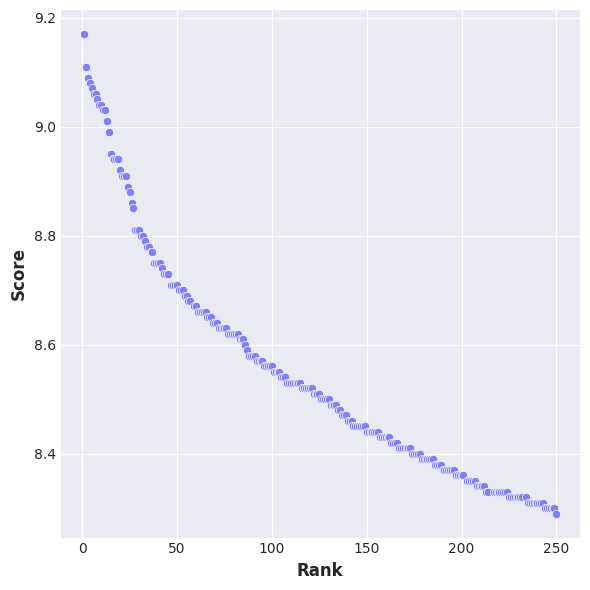

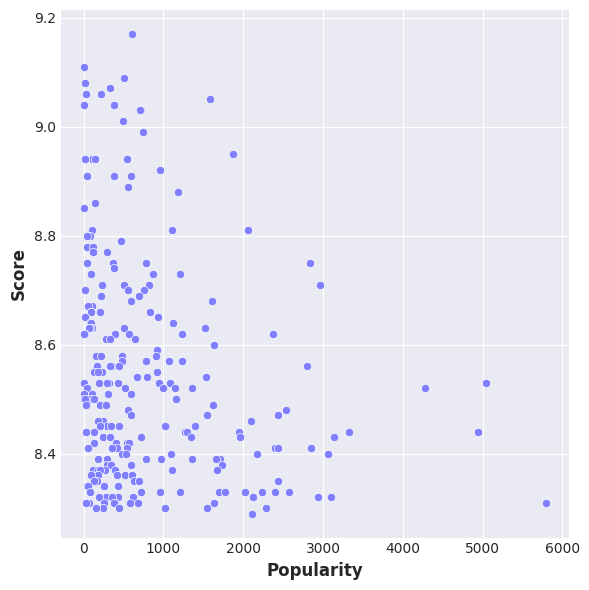

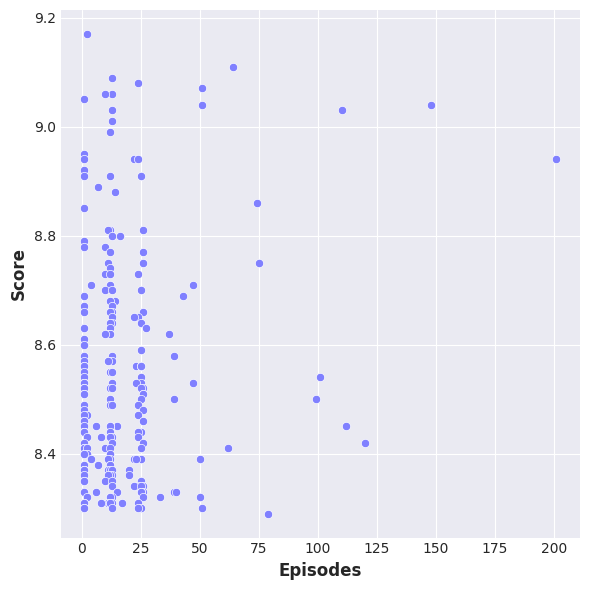

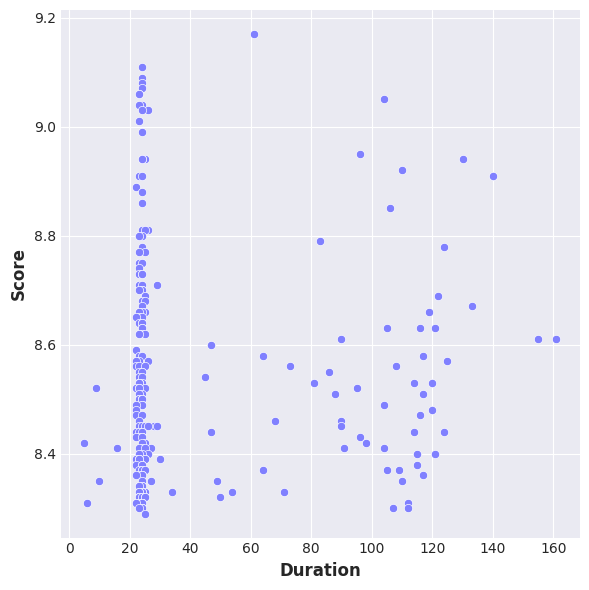

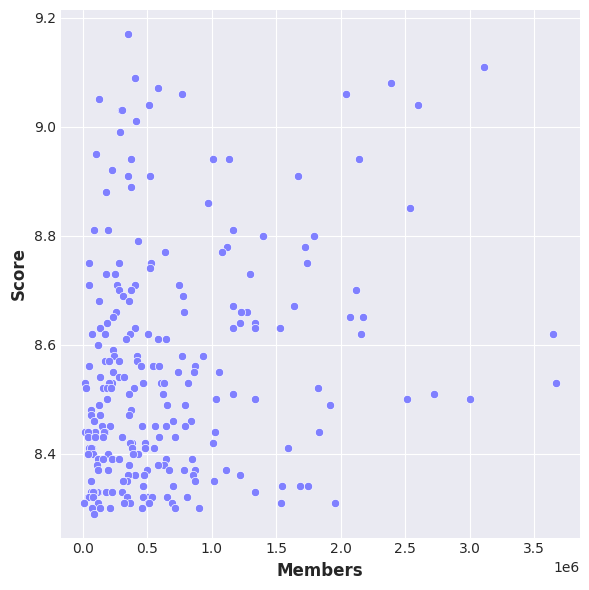

In [8]:
y = anime['Score']
anime1 = anime.drop(['Score'], axis=1)

num_cols = [col for col in anime1.columns if anime1[col].dtype in ['int64','float64']]

for idx, col in enumerate(num_cols):
    plt.figure(idx, figsize=(6,6))
    sns.scatterplot(x=col, y=y, data=anime1, c="#8080ff")
    plt.show

In [9]:
# phương sai giữa các tính năng số
var= anime1[num_cols].var()
# tạo DataFrame từ các giá trị phương sai
var_df = pd.DataFrame({'Variance': var})
# in Khung dữ liệu phương sai
var_df

,Variance
Rank,5.174420e+03
Popularity,9.001405e+05
Episodes,5.834239e+02
Duration,1.281889e+03
Members,4.642127e+11


In [10]:
# tính hệ số biến thiên (CV) (calculate coefficient of variation )
cv = (anime1[num_cols].std() / anime1[num_cols].mean())*100
# tạo DataFrame từ các giá trị CV
cv_df = pd.DataFrame({'CV': cv})
# in Khung dữ liệu CV
cv_df


,CV
Rank,57.726556
Popularity,115.566377
Episodes,134.189826
Duration,84.422578
Members,102.470629


Dữ liệu cần được chuẩn hóa vì có mức độ không đồng nhất cao giữa các đặc điểm (CV > 35%).

### Phân tích thành phần chính ¶

In [11]:
features = ['Rank','Popularity','Episodes','Duration','Members']

X = anime[features]
# normalizing features
X_norm = (X - X.mean(axis=0))/X.std(axis=0)
# principal component analysis on features
pca = PCA()
# fit and transform X_norm to PCA dataframe
X_pca = pca.fit_transform(X_norm)
# converting to dataframe
names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pcadf = pd.DataFrame(X_pca, columns=names)
print(X_pcadf.head())
print("-----------------------------------")
print("Shape of PCA DataFrame:", X_pcadf.shape)

        PC1       PC2       PC3       PC4       PC5
0  0.033142 -1.224202  1.323529 -0.653871 -0.498674
1  4.019105 -0.189807  0.654004  0.580747  1.861159
2  0.590096 -0.306899  1.277584 -1.026281 -0.541206
3  2.776837 -0.862173  0.397967 -0.564116  1.170749
4  1.415585  0.474032  1.630559  0.051368 -0.532044
-----------------------------------
Shape of PCA DataFrame: (244, 5)


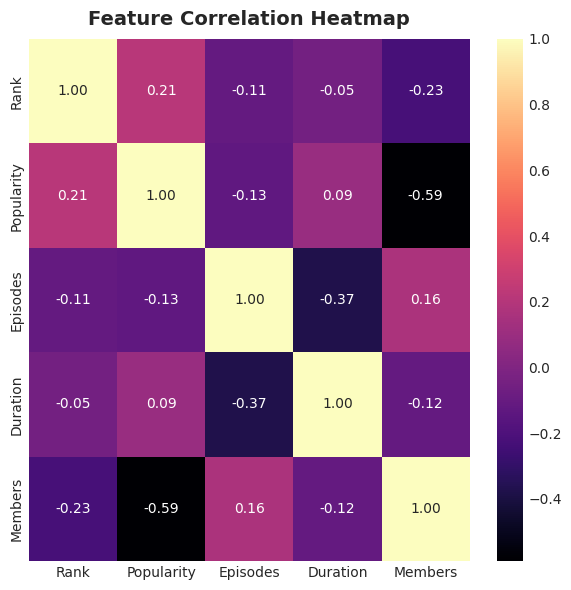

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# create covariance matrix
corr_matrix = np.corrcoef(X_norm.T)

# create heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, cmap='magma', annot=True, fmt='.2f',
            xticklabels=anime1[num_cols].columns, yticklabels=anime1[num_cols].columns)

# set plot title
plt.title('Feature Correlation Heatmap')

# show plot
plt.show()


In [13]:
# calculate eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(corr_matrix)

# sort the eigenvalues and eigenvectors in descending order
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]

# convert to dataframes
eigenvalues_df = pd.DataFrame({'Eigenvalue': eigenvalues}, index=anime1[num_cols].columns)
eigenvalues_df['Proportion'] = eigenvalues_df['Eigenvalue'] / eigenvalues_df['Eigenvalue'].sum()
eigenvalues_df['Cumulative Proportion'] = eigenvalues_df['Proportion'].cumsum()

# display dataframes
print("Eigenvalues:")
display(eigenvalues_df.style.format({'Eigenvalue': '{:.4f}', 'Proportion': '{:.4f}', 'Cumulative Proportion': '{:.4f}'}))

Eigenvalues:


,Eigenvalue,Proportion,Cumulative Proportion
Rank,1.8564,0.3713,0.3713
Popularity,1.2595,0.2519,0.6232
Episodes,0.8864,0.1773,0.8005
Duration,0.5882,0.1176,0.9181
Members,0.4095,0.0819,1.0000


Giá trị riêng ít nhất phải bằng 1. Hai biến đầu tiên giữ 62,32% tổng độ biến thiên, đây là một giá trị tốt.

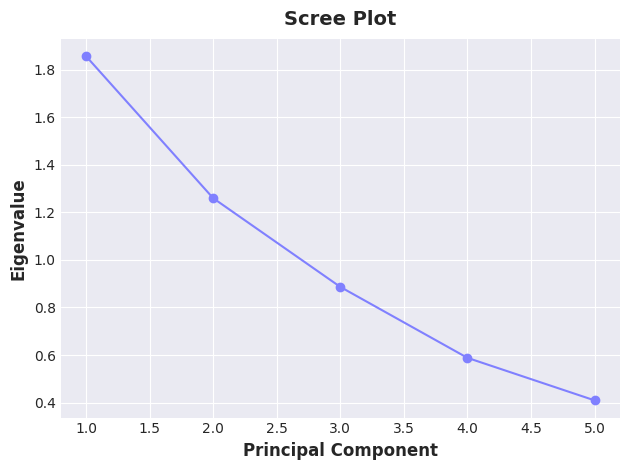

In [14]:
import matplotlib.pyplot as plt

# plot scree plot
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', color='#8080ff')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.show()


Scree Plot gợi ý kết quả tương tự như EigenValues.

[0.37128889 0.25189539 0.17728745 0.1176361  0.08189217]


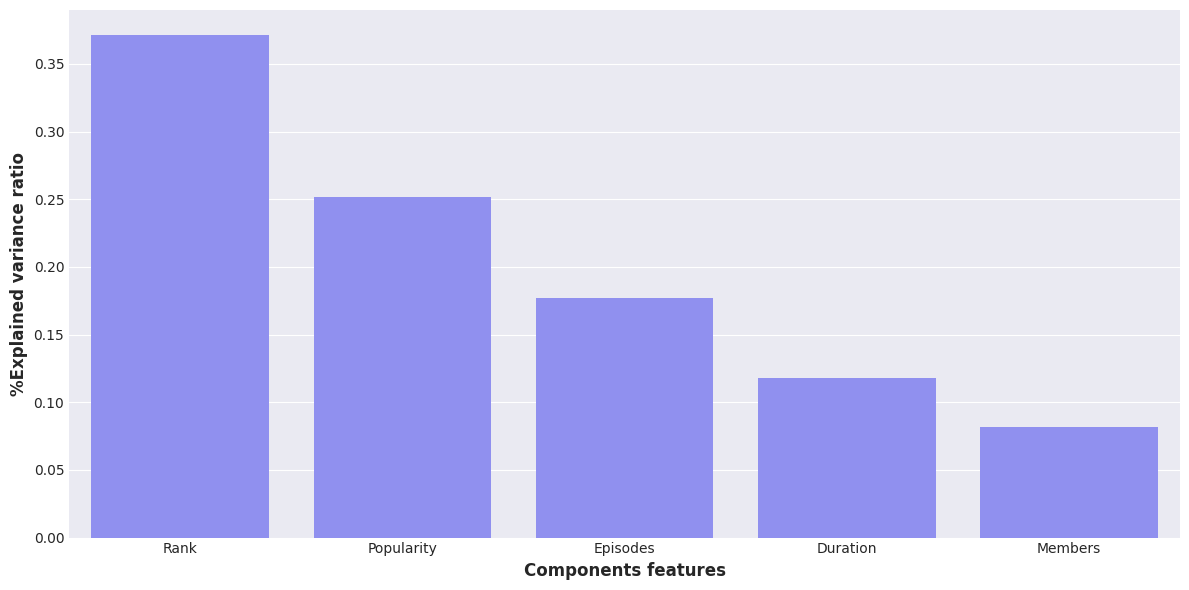

In [15]:
evr = pca.explained_variance_ratio_
print(evr)
features = ['Rank', 'Popularity', 'Episodes', 'Duration', 'Members']

# plot the EVR using matplotlib pyplot    
plt.figure(figsize=(12,6))
sns.barplot(x=np.array(features), y=evr, color='#8080ff')
plt.xlabel("Components features")
plt.ylabel("%Explained variance ratio")
plt.show()


[1.85644444 3.11592139 4.00235864 4.59053914 5.        ]


<function matplotlib.pyplot.show(close=None, block=None)>

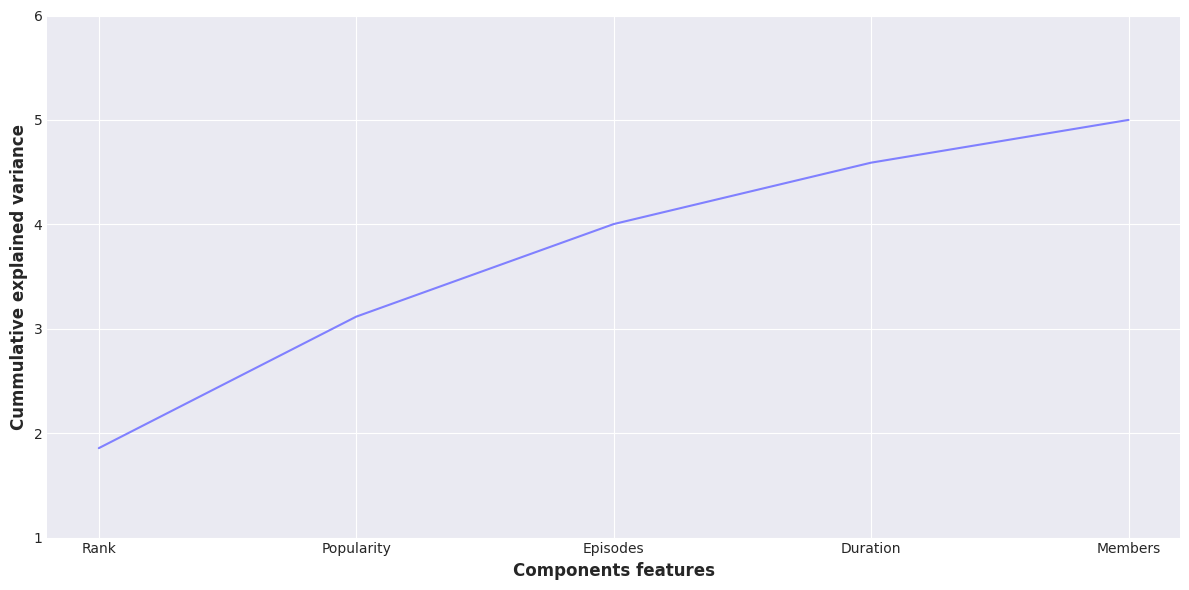

In [16]:
evc = np.cumsum(pca.explained_variance_)
print(evc)

features = ['Rank', 'Popularity', 'Episodes', 'Duration', 'Members']

plt.figure(figsize=(12,6))
sns.lineplot(x=np.array(features), y=evc, color='#8080ff')
plt.xlabel("Components features")
plt.ylabel("Cummulative explained variance")
plt.ylim(1,6)
plt.show

In [17]:
loadings = pd.DataFrame(pca.components_.T[:,:2], index=np.array(features), columns=names[:2])
loadings

,PC1,PC2
Rank,-0.330424,0.319736
Popularity,-0.573841,0.265989
Episodes,0.365957,0.559995
Duration,-0.280328,-0.678120
Members,0.590778,-0.231468


#### Axis Rotation : Varimax Orthogonal 

In [18]:
features = ['Rank', 'Popularity', 'Episodes', 'Duration', 'Members']
X = anime1[features]

# normalizing features
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)

# fit factor analyzer with principal components and varimax rotation
fa = FactorAnalyzer(rotation="varimax", n_factors=2, method='principal')
fa.fit(X_norm)

# get the rotated factor pattern
loadings2 = pd.DataFrame(fa.loadings_, index=X_norm.columns, columns=[f"Factor{i+1}" for i in range(2)])
rotated_factor_pattern = loadings2[abs(loadings2) >= 0.4].dropna(how='all')

# display the results
rotated_factor_pattern


,Factor1,Factor2
Rank,0.568164,NaN
Popularity,0.827995,NaN
Episodes,NaN,0.792008
Duration,NaN,-0.850612
Members,-0.829185,NaN


* **Yếu tố 1** được xác định bởi Thứ hạng, Mức độ nổi tiếng và Thành viên (Tình trạng Anime) 
* **Yếu tố 2** được xác định bởi Số tập và Thời lượng (Chi tiết Anime)

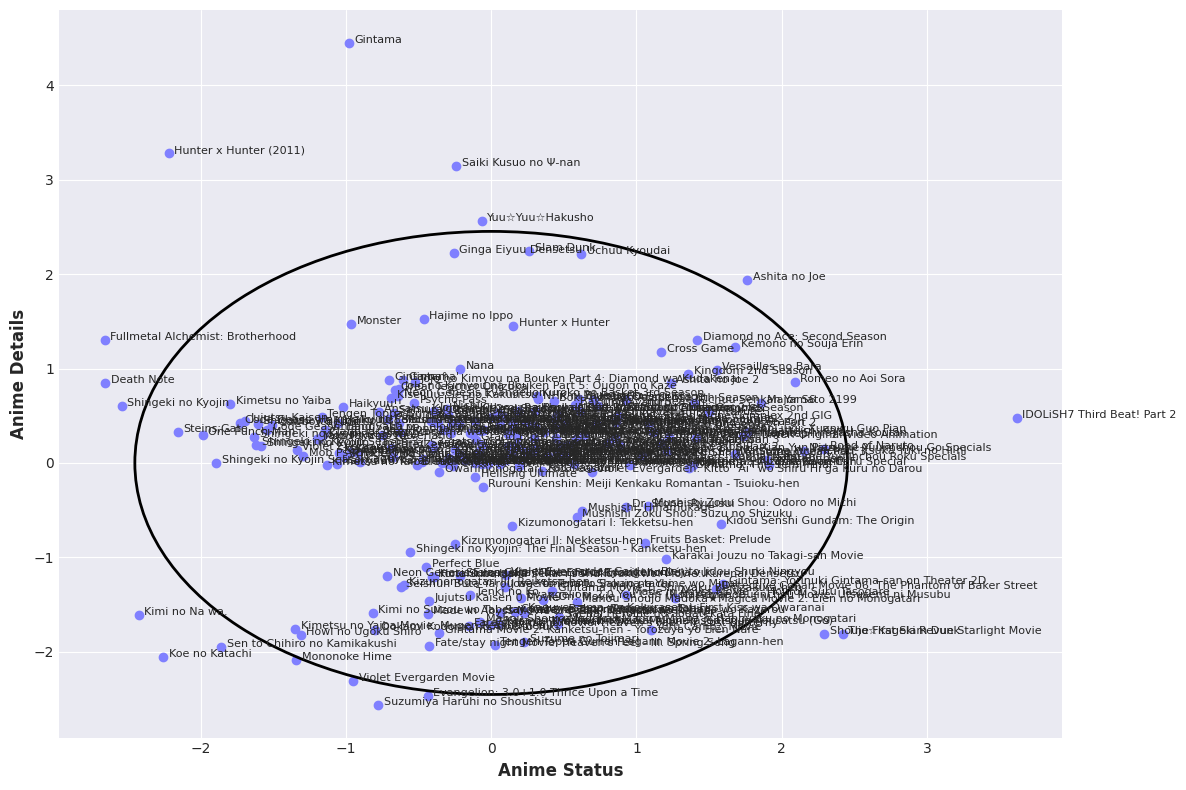

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from matplotlib.patches import Ellipse

loadings = fa.loadings_

# Get the rotated factors
factors = fa.transform(X_norm)

# Create scatter plot
fig, ax = plt.subplots(figsize=(12, 8))
sc = ax.scatter(factors[:,0], factors[:,1], c='#8080ff')

# Add anime titles to the points
for i, title in enumerate(anime1['Title']):
    ax.annotate(title, (factors[i,0], factors[i,1]), xytext=(4,0), textcoords='offset points', fontsize=8)

# Add axis labels
ax.set_xlabel('Anime Status')
ax.set_ylabel('Anime Details')

# Add 95% ellipse
mean = np.mean(factors[:,0:2], axis=0)
cov = np.cov(factors[:,0], factors[:,1])
w, v = np.linalg.eig(cov)
theta = np.degrees(np.arctan2(*v[:,0][::-1]))
width, height = 2 * np.sqrt(w * 5.991)
ellipse = Ellipse(xy=mean, width=width, height=height, angle=theta, edgecolor='black', fc='None', lw=2)
ax.add_patch(ellipse)

plt.show()

Chúng tôi có thể xác định một số ngoại lệ. Ví dụ: 
* Gintama, HunterxHunter(2011) có giá trị cao hơn cho **Yếu tố chi tiết anime**, có nhiều tập và/hoặc thời lượng dài cho mỗi tập, nhưng đồng thời có giá trị thấp hơn cho **Yếu tố 2**, nghĩa là 2 animes được người hâm mộ yêu thích. 
* Ashita No Joe, Nhịp thứ ba của IDOLiSH7! Phần 2 kém hơn trên bảng xếp hạng, có giá trị cao cho **Yếu tố Trạng thái Anime**.

### Linear Regression 

In [20]:
# obtain the factor scores
factor_scores = fa.transform(X_norm)

# convert to dataframe
factor_scores_df = pd.DataFrame(factor_scores, columns=['Anime Status', 'Anime Details'])

# add the factor scores as new columns to your original dataframe
anime_with_factor_scores = pd.concat([anime, factor_scores_df], axis=1)
anime_with_factor_scores = anime_with_factor_scores.dropna()

# perform regression analysis using the factor scores as predictors
import statsmodels.api as sm

X1 = anime_with_factor_scores[['Anime Status', 'Anime Details']] # use the factor scores as predictors
Y1 = anime_with_factor_scores['Score'] # your dependent variable

X1 = sm.add_constant(X1) # add a constant to your predictor variables
model = sm.OLS(Y1, X1).fit() # fit the regression model
print(model.summary()) # print the summary of the model

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     49.17
Date:                Fri, 19 May 2023   Prob (F-statistic):           1.45e-18
Time:                        09:05:51   Log-Likelihood:                 80.817
No. Observations:                 238   AIC:                            -155.6
Df Residuals:                     235   BIC:                            -145.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.5534      0.011    760.883

* Điểm Anime chỉ bị ảnh hưởng bởi **Yếu tố Trạng thái Anime**, nghĩa là các giá trị Xếp hạng thấp hơn, Giá trị thấp hơn cho Mức độ phổ biến và số lượng thành viên thêm anime vào danh sách của họ cao hơn sẽ dẫn đến điểm số cao hơn (Lưu ý rằng Xếp hạng và Mức độ phổ biến xác định Nhân tố xoay theo chiều dương, còn Thành viên theo chiều âm). 
* Vì Giá trị P cho **Yếu tố chi tiết Anime** có giá trị lớn hơn 0,05, điều đó có nghĩa là số tập và thời lượng của các tập không ảnh hưởng đến Điểm Anime.